# k-Nearest Neighbor (KNN)

[wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Classification and Regression

* Lazy learner

  * [Instance Based](https://en.wikipedia.org/wiki/Instance-based_learning)
  * Lazy because it does not try to learn a function from the training data. 
  * It memorise the pattern from the dataset


* [Nonparametric model](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

  * distribution-free tests because no assumption of the data needing to follow a specific distribution
  * [wikipedia](https://en.wikipedia.org/wiki/Nonparametric_statistics)
  * Other examples - Decision Tree, Random Forest



Used for:

* Predict cancer is malignant or benign
* Pattern recognition
* Recommender Systems
* Computer Vision
* Gene Expression
* Protein-Protein Interaction and 3D Structure Prediction




## Disadvantages

* Not efficient on big data
* Curse of dimensionality. Very susceptible to overfitting


References:

* [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

* [Scikit-Learn Nearest Neighbours](http://scikit-learn.org/stable/modules/neighbors.html)

* [Introduction to k-nearest neighbors : Simplified](https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/)

* [Quora](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm)

* [Kevin Zakka](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

* [CS231n CNN](http://cs231n.github.io/classification/#nn)

* [A Detailed Introduction to K-Nearest Neighbor (KNN) Algorithm](https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/)

* [Chris Albon](https://chrisalbon.com/)

* [K-Nearest Neighbors for Machine Learning](https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)

* [Introduction to Data Mining](http://www-users.cs.umn.edu/~kumar/dmbook/index.php)

## Steps:

* Choose the number of $k$
* Select a distance metric
* Find the k nearest neighbors of the sample
* Assign the class label by majority vote



***

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

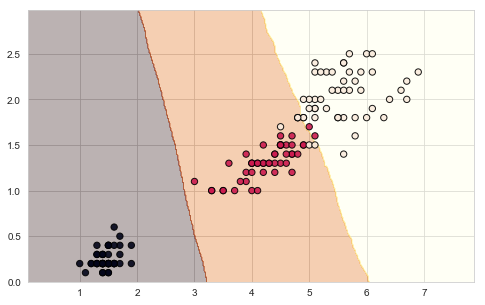

In [16]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3, 
                  );
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
            alpha=0.9, edgecolors='k');